### Book chapters

The Adaptive Exponential Integrate-and-Fire model is introduced in Chapter 6 Section 1

### Python classes

Use function `AdEx.simulate_AdEx_neuron()` to run the model for different input currents and different parameters. Get started by running the following script:

In [1]:
% matplotlib inline
import brian2 as b2
from neurodynex.adex_model import AdEx
from neurodynex.tools import plot_tools, input_factory

nr of spikes: 10


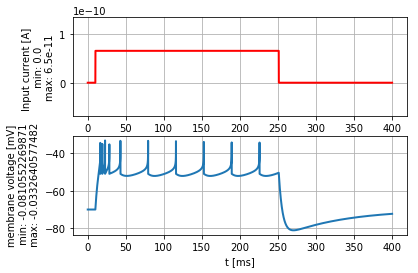

In [2]:
current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

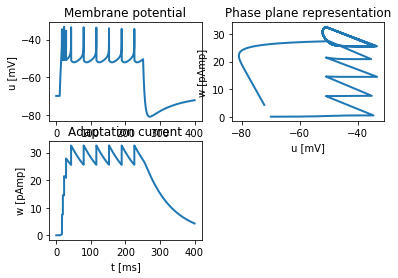

In [3]:
AdEx.plot_adex_state(state_monitor)

## 4.1. Exercise: Adaptation and firing patterns
We have implemented an Exponential Integrate-and-Fire model with a single adaptation current w:

$$
\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}
$$

### 4.1.1. Question: Firing pattern
- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in Chapter 6.1
- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create **adapting**, **bursting** and **irregular** firing patterns. Table 6.1 in Chapter 6.2 provides a starting point for your explorations.
- In order to better understand the dynamics, it is useful to observe the joint evolution of `u` and `w` in a phase diagram. Use the function `AdEx.plot_adex_state()` to get more insights. Fig. 6.3 in Chapter 6 Section 2 shows a few trajectories in the phase diagram.

1. Busrt-tonic

2. Table 6.1

|Type|Fig.|τm (ms)|a (nS)|τw (ms)|b (pA)|ur (mV)|
| ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|Tonic|6.3A|20|0.0|30.0|60|-55|
|Adapting|6.3B|20|0.0|100|5.0|-55|
|Init. burst|6.4A|5.0|0.5|100|7.0|-51|
|Bursting|6.4C|5.0|-0.5|100|7.0|-46|
|Irregular|6.5A|9.9|-0.5|100|7.0|-46|
|Transient|6.9A|10|1.0|100|10|-60|
|Delayed| |5.0|-1.0|100|10|-60|

In [4]:
# Adapting

tau_m = 20
tau_w = 100
a = 0
b = 5
v_reset = -55

nr of spikes: 10


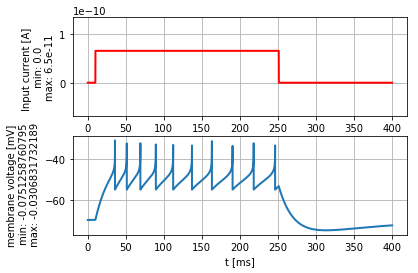

In [5]:
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
    I_stim=current,
    simulation_time=400 * b2.ms,
    tau_m=tau_m*b2.ms,
    a=a*b2.nS,
    tau_w=tau_w*b2.ms,
    b=b*b2.pA,
    v_reset=v_reset*b2.mV
)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

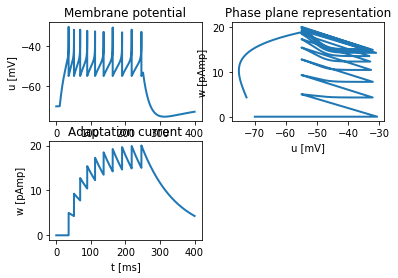

In [6]:
AdEx.plot_adex_state(state_monitor)

In [7]:
# Bursting

tau_m = 5
tau_w = 100
a = -0.5
b = 7
v_reset = -46

nr of spikes: 20


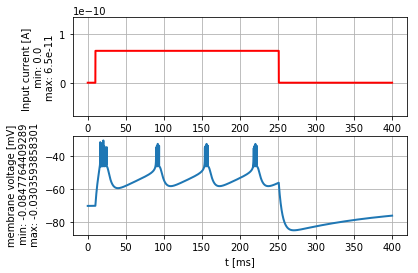

In [8]:
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
    I_stim=current,
    simulation_time=400 * b2.ms,
    tau_m=tau_m*b2.ms,
    a=a*b2.nS,
    tau_w=tau_w*b2.ms,
    b=b*b2.pA,
    v_reset=v_reset*b2.mV
)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

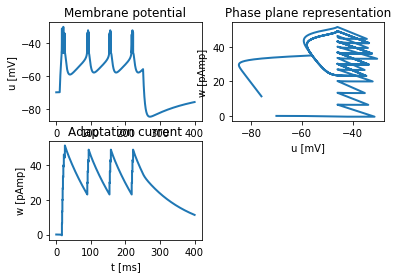

In [9]:
AdEx.plot_adex_state(state_monitor)

In [10]:
# Irregular

tau_m = 9.9
tau_w = 100
a = -0.5
b = 7
v_reset = -46

nr of spikes: 18


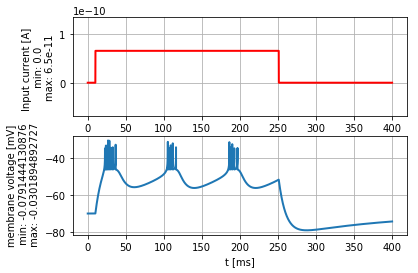

In [11]:
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
    I_stim=current,
    simulation_time=400 * b2.ms,
    tau_m=tau_m*b2.ms,
    a=a*b2.nS,
    tau_w=tau_w*b2.ms,
    b=b*b2.pA,
    v_reset=v_reset*b2.mV
)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

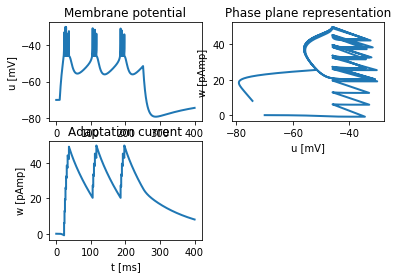

In [12]:
AdEx.plot_adex_state(state_monitor)

## 4.2. Exercise: phase plane and nullclines
First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.

1. Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
2. How do the nullclines change with respect to `a`?
3. How do the nullclines change if a constant current `I(t) = c` is applied?
4. What is the interpretation of parameter `b`?
5. How do flow arrows change as `tau_w` gets bigger?

### 4.2.1. Question:
Can you predict what would be the firing pattern if a is small (in the order of 0.01 nS) ? To do so, consider the following 2 conditions:

1. A large jump b and a large time scale tau_w.
2. A small jump b and a small time scale tau_w.

Try to simulate the above conditions, to see if your predictions were true.

In [13]:
# default parameters
a = 0.01
tau_w = 100
b = 7

nr of spikes: 13


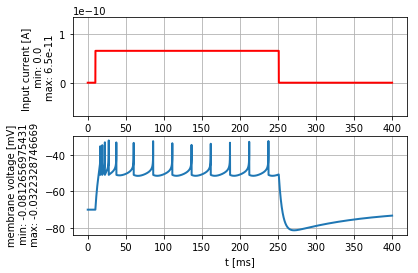

In [14]:
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
    I_stim=current,
    simulation_time=400 * b2.ms,
    a=a*b2.nS,
    tau_w=tau_w*b2.ms,
    b=b*b2.pA,
)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [15]:
# 1
tau_w = 1000
b = 70

nr of spikes: 1


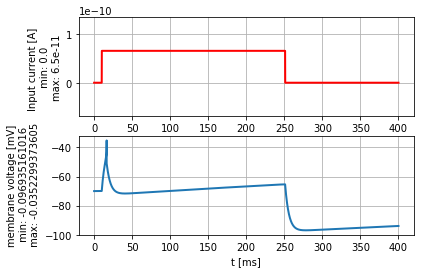

In [16]:
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
    I_stim=current,
    simulation_time=400 * b2.ms,
    a=a*b2.nS,
    tau_w=tau_w*b2.ms,
    b=b*b2.pA,
)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [17]:
# 2
tau_w = 10
b = 0.7

nr of spikes: 101


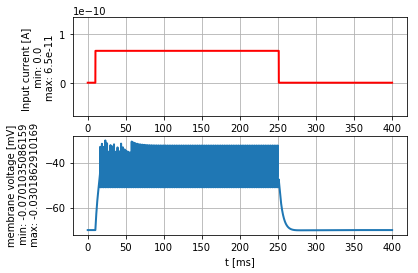

In [18]:
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
    I_stim=current,
    simulation_time=400 * b2.ms,
    a=a*b2.nS,
    tau_w=tau_w*b2.ms,
    b=b*b2.pA,
)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 4.2.2. Question:
To learn more about the variety of patterns the relatively simple neuron model can reproduce, have a look the following publication: Naud, R., Marcille, N., Clopath, C., Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological cybernetics, 99(4-5), 335-347.